## Predicciones en el Mercado Inmobiliario de Dinamarca

#### 1. Análisis exploratorio de los datos analizando las diferentes regiones, precios, tamaños, características, tipos... a lo largo de los años.

#### 2. Predicciones sobre las futuras ventas de casas, precios según las regiones, tamaños y tipos de casa predominante.

## 1. EDA

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression

In [5]:
#Cargar csv
df_houses = pd.read_csv('houses.csv')
#Filtro para solo años por encima de 1800
df_houses_year = df_houses[df_houses['year_build'] > 1800]

### Limpieza de datos

In [6]:
#Eliminar columnas sin interés
columns_to_drop = ['nom_interest_rate%', 'dk_ann_infl_rate%', 'yield_on_mortgage_credit_bonds%']
df_houses = df_houses.drop(columns=columns_to_drop)

In [7]:
# Contar el número de filas duplicadas
num_duplicates = df_houses.duplicated().sum()
print(f"Número de filas duplicadas: {num_duplicates}")

Número de filas duplicadas: 0


In [8]:
# Encontrar filas duplicadas
filas_duplicadas = df_houses[df_houses.duplicated()]

In [9]:
def valores_faltantes(data):
  total = data.isnull().sum()
  porcentaje = (data.isnull().sum()/data.isnull().count()*100)
  tt = pd.concat([total, porcentaje], axis=1, keys=['Total', 'Porcentaje'])
  types = []
  for col in data.columns:
    dtype = str(data[col].dtype)
    types.append(dtype)
  tt['Tipos'] = types
  return np.transpose(tt)

valores_faltantes(df_houses)

,date,quarter,house_id,house_type,sales_type,year_build,purchase_price,%_change_between_offer_and_purchase,no_rooms,sqm,sqm_price,address,zip_code,city,area,region
Total,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0
Porcentaje,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011,0.0,0.0
Tipos,object,object,int64,object,object,int64,int64,float64,int64,float64,float64,object,int64,object,object,object


In [10]:
df_houses['city'].unique()

array(['Solrød Strand', 'Frederiksberg C', 'Kalundborg', 'Farum',
       'Svendborg', 'Skovlunde', 'Erslev', 'Branderup J', 'Holsted',
       'Esbjerg', 'Jægerspris', 'Silkeborg', 'Snertinge', 'Agedrup',
       'Hornbæk', 'Sønderborg', 'Aabenraa', 'Fredericia', 'Roskilde',
       'Alsted', 'Aarhus C', 'Odense C', 'Ikast', 'Aars', 'Barrit',
       'Faxe', 'Sjællands Odde', 'Hurup Thy', 'Valby', 'Humlebæk',
       'Slagelse', 'Vig', 'Charlottenlund', 'Greve', 'Odense N',
       'Store Fuglede', 'Ringsted', 'Idestrup', 'Skødstrup',
       'Nykøbing Sj', 'København N', 'Karby', 'Faaborg', 'Ã\x85lsgårde',
       'Lemvig', 'Ansager', 'Gjerlev J', 'Hørsholm', 'Assens',
       'Vordingborg', 'Aulum', 'Ebeltoft', 'Bogense', 'Løgstrup',
       'Glostrup', 'Skive', 'Fuglebjerg', 'Astbirk', 'Rødekro', 'Malling',
       'Randers NV', 'Ringkøbing', 'Herning', 'Arbæk', 'Brovst', 'Søborg',
       'Fanø', 'Gentofte', 'Hedehusene', 'Aalborg', 'Tarm', 'Sunds',
       'Helsinge', 'Mørkøv', 'Nexø', 'Højsle

In [11]:
df_houses.head()

,date,quarter,house_id,house_type,sales_type,year_build,purchase_price,%_change_between_offer_and_purchase,no_rooms,sqm,sqm_price,address,zip_code,city,area,region
0,2024-10-24,2024Q4,16,Villa,regular_sale,1997,6500000,-3.0,5,142.0,45774.650,Spættevej 16,2680,Solrød Strand,"Capital, Copenhagen",Zealand
1,2024-10-24,2024Q4,13,Apartment,regular_sale,1885,3400000,0.0,2,46.0,73913.050,"Jakob Dannefærds Vej 10B, 4. th",1973,Frederiksberg C,"Capital, Copenhagen",Zealand
2,2024-10-23,2024Q4,60,Villa,regular_sale,1949,4550000,-4.0,4,112.0,40625.000,Vestre Plantagevej 3,2680,Solrød Strand,"Capital, Copenhagen",Zealand
3,2024-10-23,2024Q4,29,Villa,regular_sale,2001,1630000,-12.0,4,186.0,8763.440,Toftebjerg 3,4400,Kalundborg,Other islands,Zealand
4,2024-10-22,2024Q4,92,Apartment,regular_sale,1965,1975000,-10.0,3,82.0,24085.365,"Ryttergårdsvej 20, 1. 113",3520,Farum,North Zealand,Zealand


### Comparar precios a lo largo del tiempo según tipo de casa

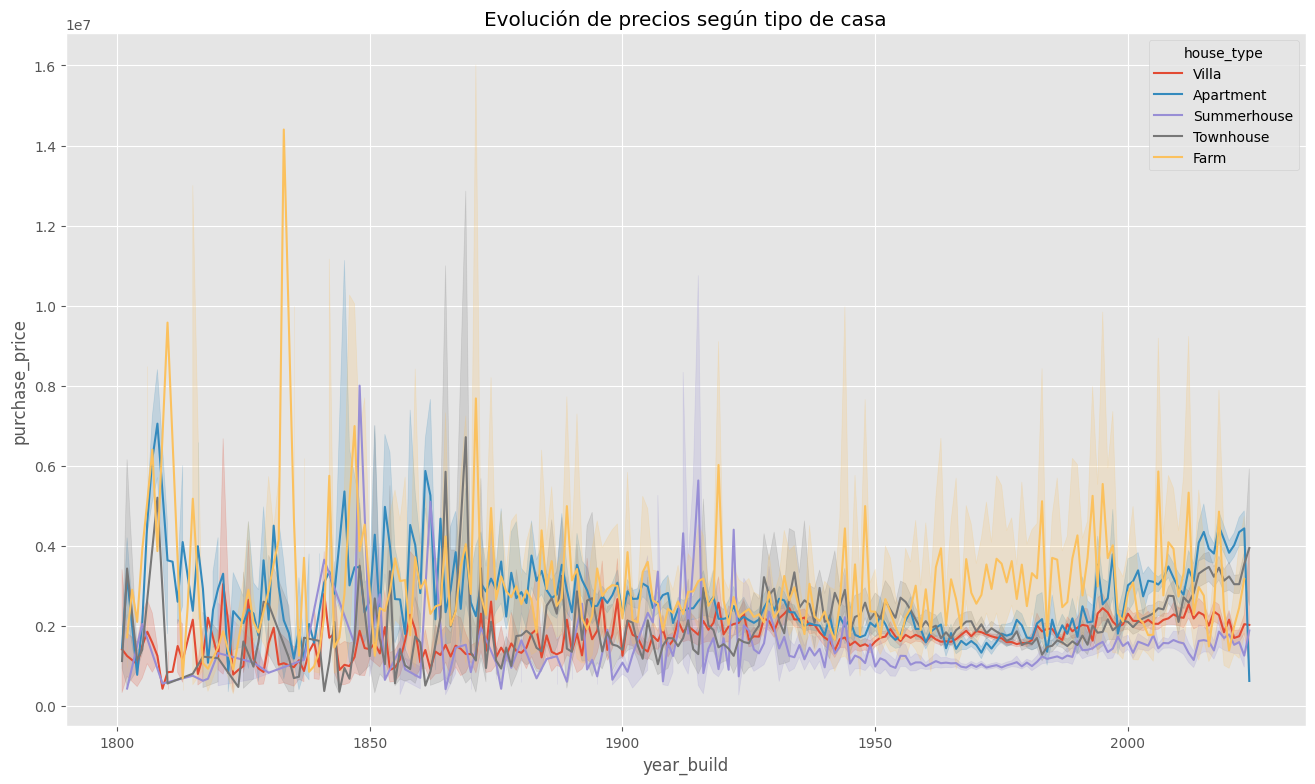

In [12]:
#Gráfico de evolución de precios según house_type
sns.lineplot(x='year_build', y='purchase_price', data=df_houses_year, hue='house_type')
plt.title('Evolución de precios según tipo de casa')
plt.show()

### Comparar los precios según región a lo largo del tiempo

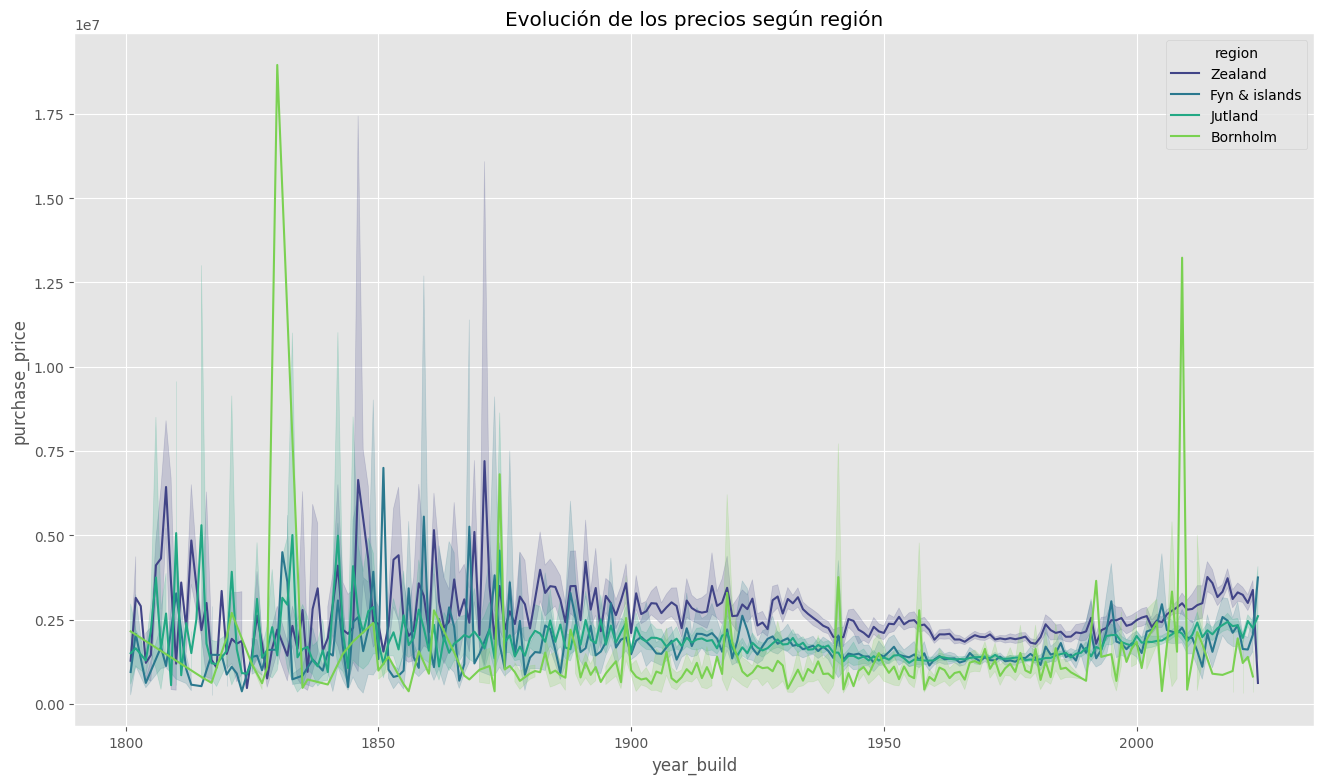

In [13]:
# Gráfico de la evolución de los precios según region
plt.figure(figsize=(16, 9))
sns.lineplot(x='year_build', y='purchase_price', data=df_houses_year, hue='region', palette='viridis')
plt.title('Evolución de los precios según región')
plt.show()

### Comparar tamaño y precio según región

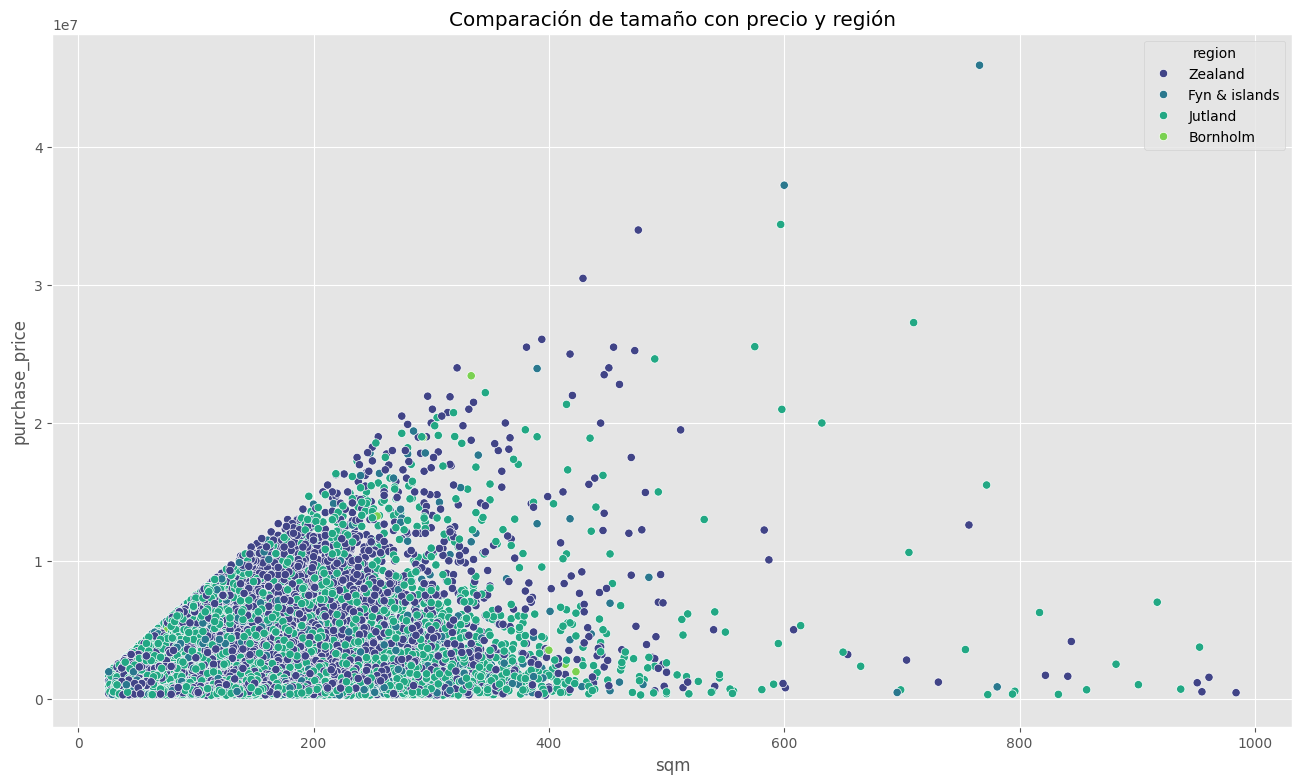

In [14]:
# Gráfico para comparar sqm con purchase_price y region
plt.figure(figsize=(16, 9))
sns.scatterplot(x='sqm', y='purchase_price', data=df_houses, hue='region', palette='viridis')
plt.title('Comparación de tamaño con precio y región')
plt.show()

### Comparar Precio y tamaño a lo largo de los años

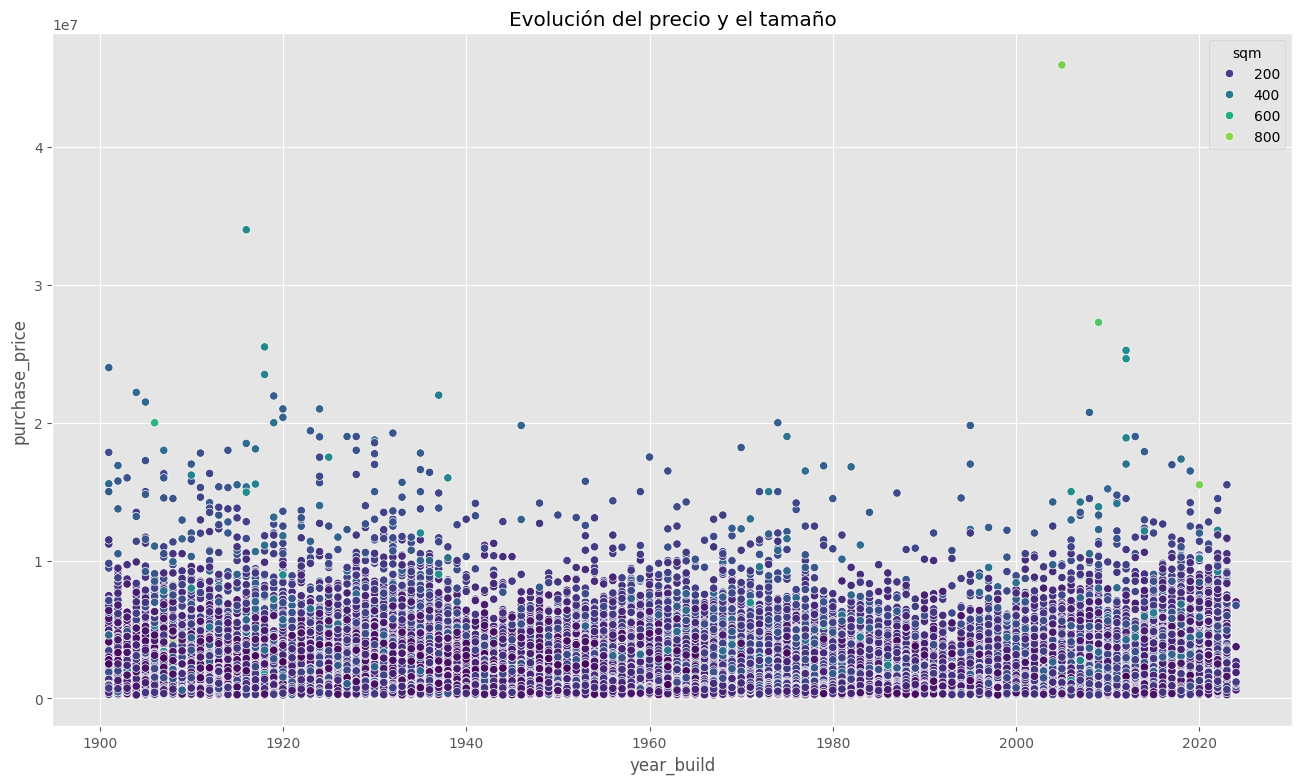

In [15]:
#Filtro para solo años por encima de 1900
df_houses_1900 = df_houses[df_houses['year_build'] > 1900]
#Gráfico para comparar year_build con purchase_price y sqm
plt.figure(figsize=(16, 9))
sns.scatterplot(x='year_build', y='purchase_price', data=df_houses_1900, hue='sqm', palette='viridis')
plt.title('Evolución del precio y el tamaño')
plt.show()

### Evolución de tipos de casa en cada región

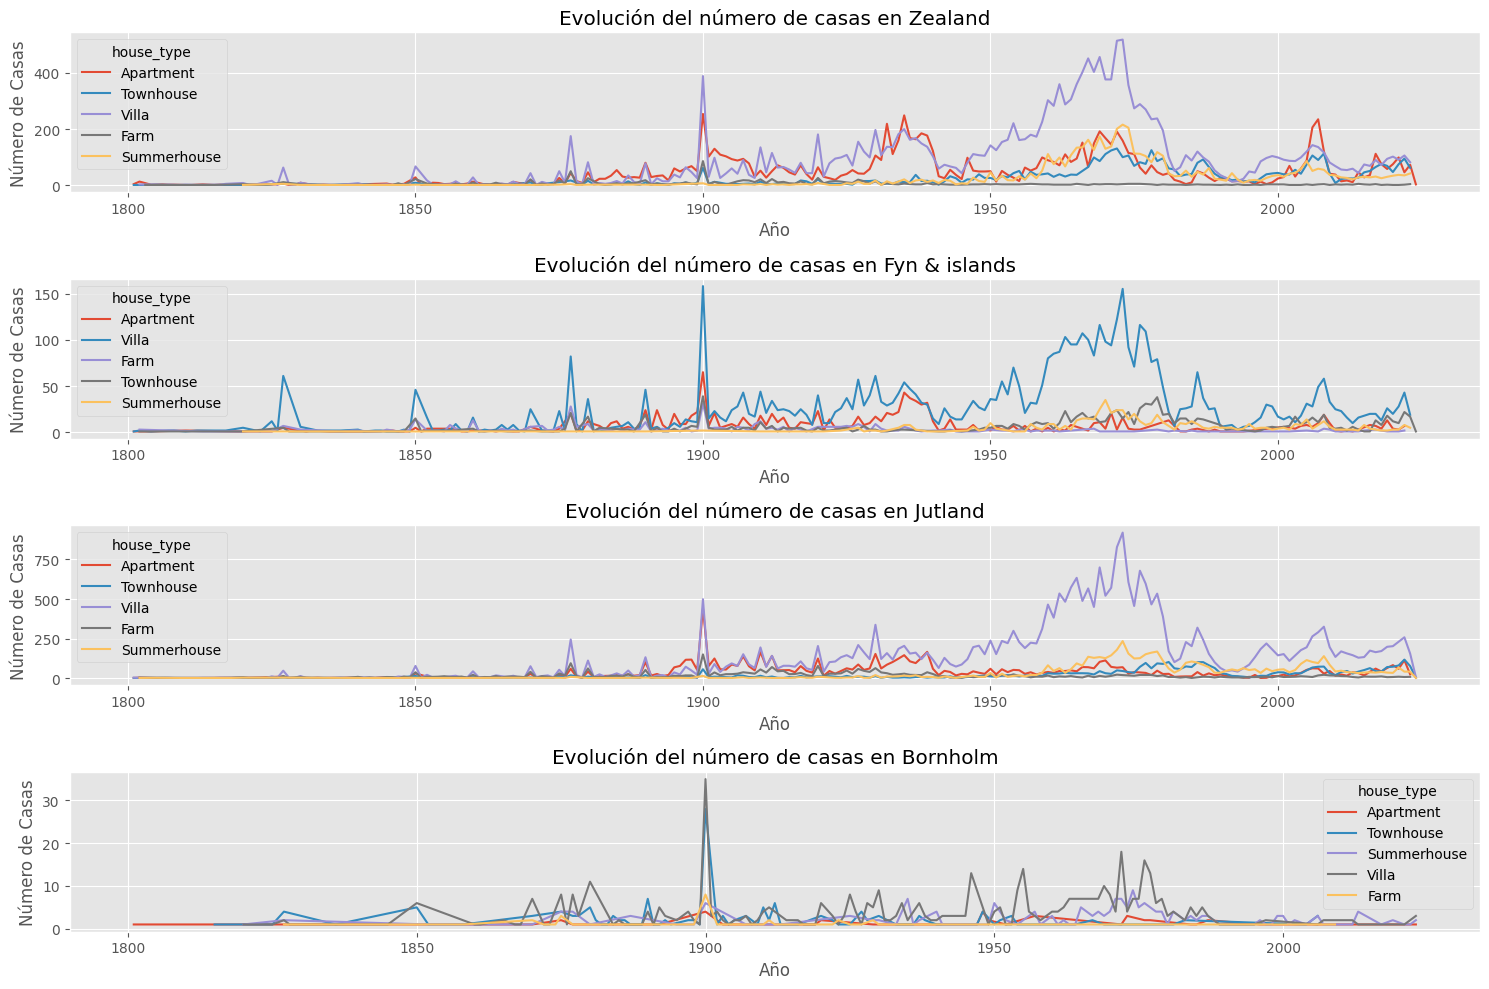

In [16]:
# funcion para contar
def contar(data, column1, column2):
  df = data.groupby(['year_build', column1, column2]).size().reset_index(name='counts')
  return df

# Crear el gráfico
plt.figure(figsize=(15, 10))

# Obtener las regiones únicas
regiones = df_houses_year['region'].unique()

# Crear un gráfico para cada región
for i, region in enumerate(regiones):
    df = contar(df_houses_year, 'region', 'house_type')
    plt.subplot(len(regiones), 1, i + 1)
    region_data = df[df['region'] == region]
    sns.lineplot(data=region_data, x='year_build', y='counts', hue='house_type')
    plt.title(f'Evolución del número de casas en {region}')
    plt.xlabel('Año')
    plt.ylabel('Número de Casas')

plt.tight_layout()
plt.show()

### Evolución de casas según región

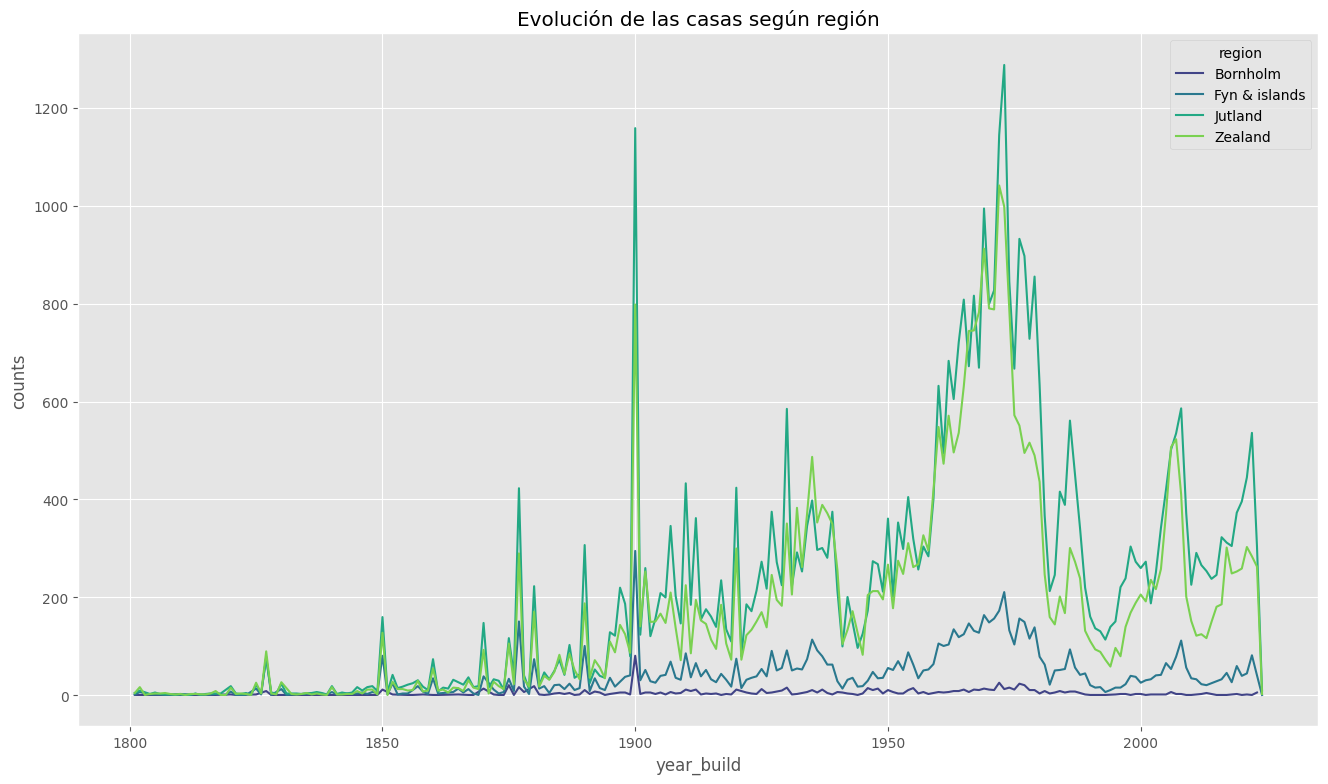

In [17]:
# funcion para contar solo una columna
def contar_una(data, column1):
  df = data.groupby(['year_build', column1]).size().reset_index(name='counts')
  return df

# Gráfico Evolución de número de casas según región a lo largo de los años
df = contar_una(df_houses_year, 'region')
plt.figure(figsize=(16, 9))
sns.lineplot(x='year_build', y='counts', data=df, hue='region', palette='viridis')
plt.title('Evolución de las casas según región')
plt.show()

### Evolución del número de habitaciones según región

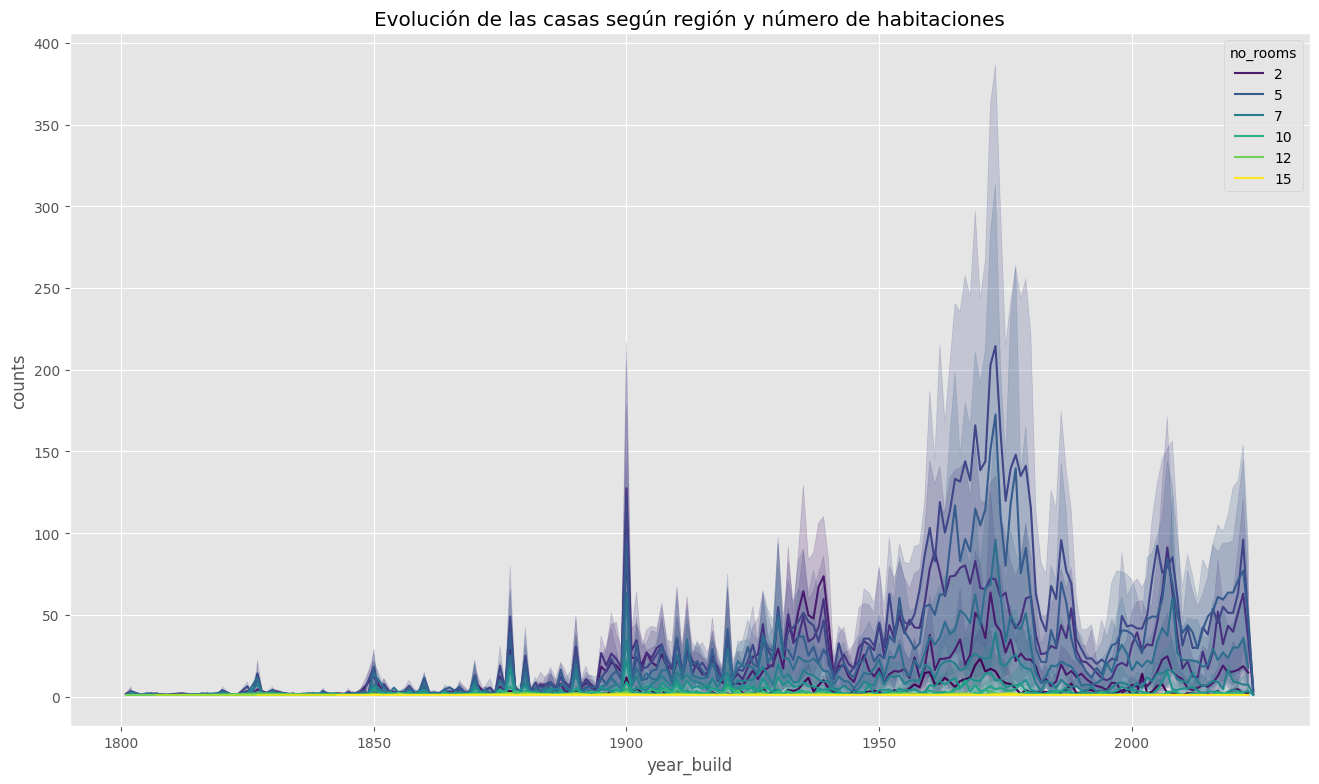

In [18]:
# gráfico Evolución del número de casas con diferente numero de habitaciones según región a lo largo de los años
df = contar(df_houses_year, 'region', 'no_rooms')
plt.figure(figsize=(16, 9))
sns.lineplot(x='year_build', y='counts', data=df, hue='no_rooms', palette='viridis')
plt.title('Evolución de las casas según región y número de habitaciones')
plt.show()

## 2. Predicciones Sobre Futuras Construcciones

### Precios por región en los próximos años

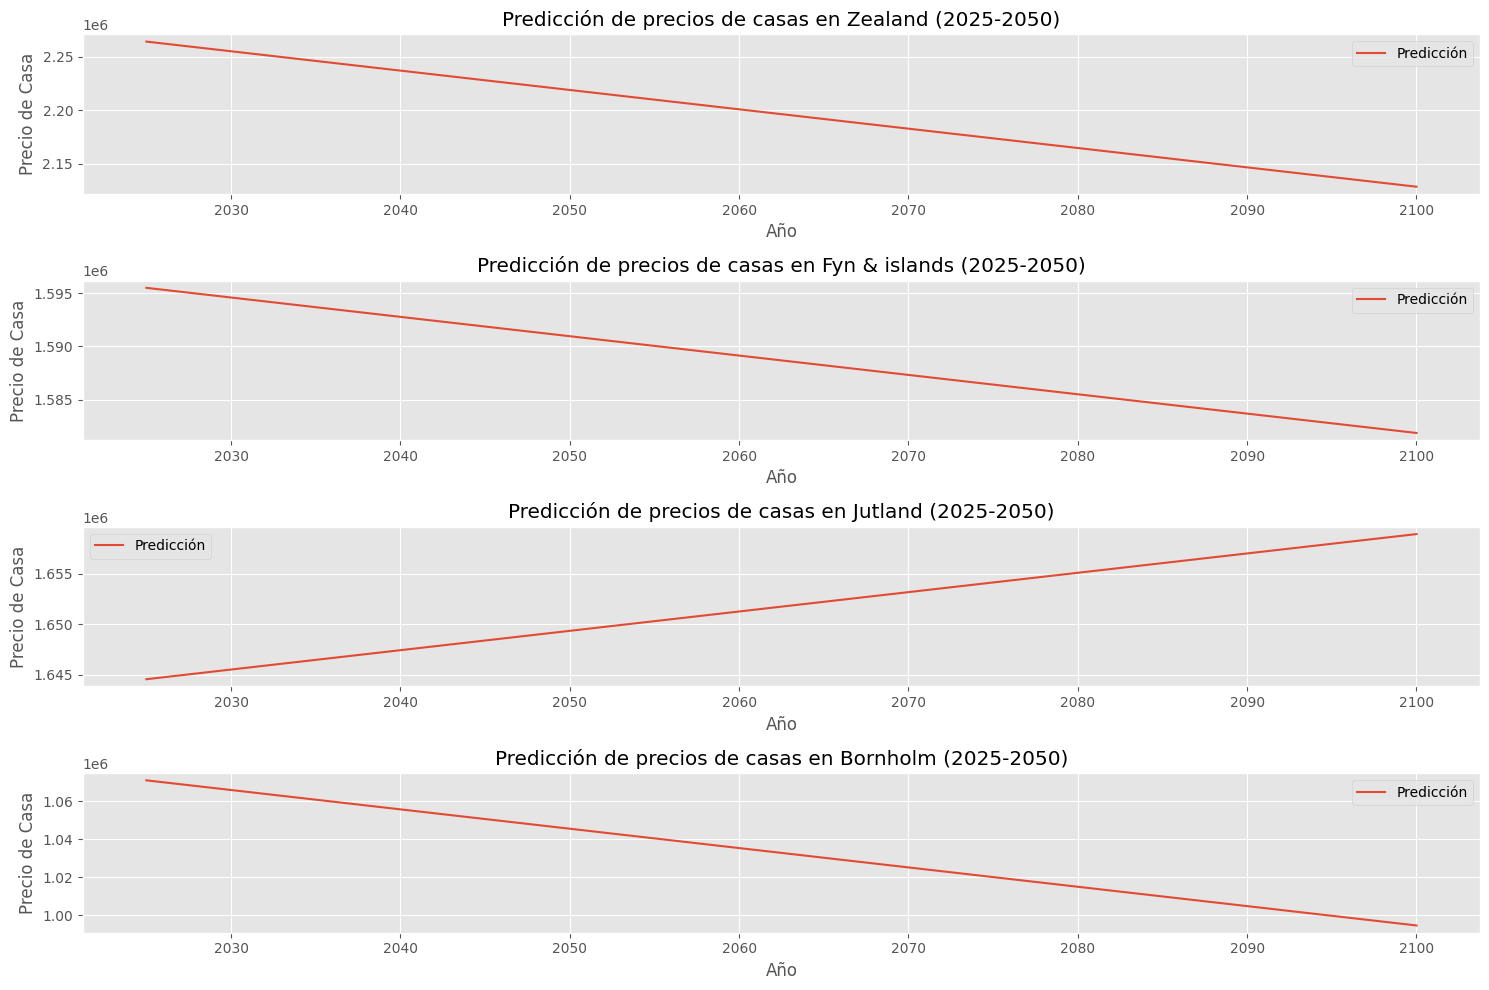

In [25]:
# Crear un modelo de regresión lineal para cada región
regiones = df_houses['region'].unique()
predicciones = {}

for region in regiones:
    region_data = df_houses[df_houses['region'] == region]
    X = region_data[['year_build']]
    y = region_data['purchase_price']
    
    model = LinearRegression()
    model.fit(X, y)
    
    # Predecir los precios de 2025 a 2050
    future_years = pd.DataFrame(np.arange(2025, 2101), columns=['year_build'])
    future_prices = model.predict(future_years)
    
    predicciones[region] = (future_years['year_build'].values, future_prices)

# Graficar las predicciones
plt.figure(figsize=(15, 10))

for i, region in enumerate(regiones):
    plt.subplot(len(regiones), 1, i + 1)
    years, prices = predicciones[region]
    plt.plot(years, prices, label='Predicción')
    plt.title(f'Predicción de precios de casas en {region} (2025-2050)')
    plt.xlabel('Año')
    plt.ylabel('Precio de Casa')
    plt.legend()

plt.tight_layout()
plt.show()

### Tipos de casa por región en los próximos años

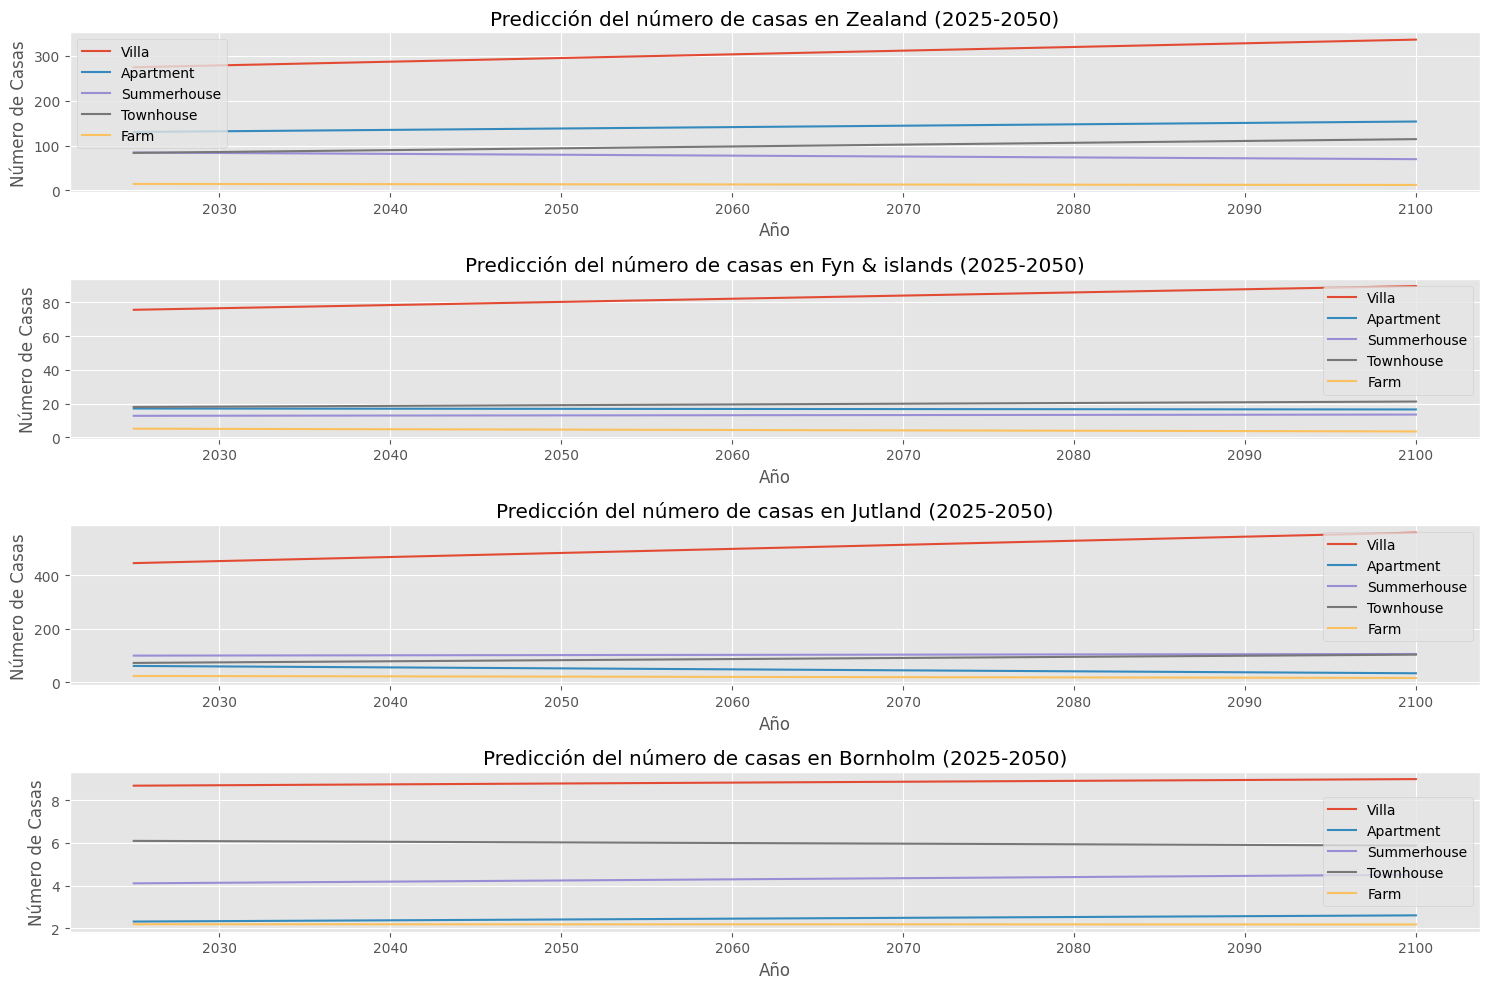

In [26]:
# Contar el número de casas por año, región y tipo de casa
df_houses['Numero_de_Casas'] = df_houses.groupby(['year_build', 'region', 'house_type'])['house_id'].transform('count')

# Crear un modelo de regresión lineal para cada tipo de casa en cada región
regiones = df_houses['region'].unique()
tipos_de_casa = df_houses['house_type'].unique()
predicciones = {}

for region in regiones:
    predicciones[region] = {}
    for tipo in tipos_de_casa:
        region_tipo_data = df_houses[(df_houses['region'] == region) & (df_houses['house_type'] == tipo)]
        X = region_tipo_data[['year_build']]
        y = region_tipo_data['Numero_de_Casas']
        
        model = LinearRegression()
        model.fit(X, y)
        
        # Predecir el número de casas de 2025 a 2050
        future_years = pd.DataFrame(np.arange(2025, 2101), columns=['year_build'])
        future_casas = model.predict(future_years)
        
        predicciones[region][tipo] = (future_years['year_build'].values, future_casas)

# Graficar las predicciones
plt.figure(figsize=(15, 10))

for i, region in enumerate(regiones):
    plt.subplot(len(regiones), 1, i + 1)
    for tipo in tipos_de_casa:
        years, casas = predicciones[region][tipo]
        plt.plot(years, casas, label=tipo)
    plt.title(f'Predicción del número de casas en {region} (2025-2050)')
    plt.xlabel('Año')
    plt.ylabel('Número de Casas')
    plt.legend()

plt.tight_layout()
plt.show()